# Data Normalization 

Documentation Source : https://plot.ly/python/v3/normalization/

In [97]:
import numpy as np 
import sklearn.preprocessing as pre 
import matplotlib.pyplot as plt

In [6]:
data = np.array([
               [2,4,6],
               [3,6,9],
               [4,8,12]
                ])


In [8]:
data 

array([[ 2,  4,  6],
       [ 3,  6,  9],
       [ 4,  8, 12]])

In [11]:
a = pre.normalize(data)

In [14]:
a.std() #std = standard scaler gives data colm wise 

0.2182178902359924

In [16]:
a

array([[0.26726124, 0.53452248, 0.80178373],
       [0.26726124, 0.53452248, 0.80178373],
       [0.26726124, 0.53452248, 0.80178373]])

In [20]:
standard_scaler = pre.StandardScaler()
standard_scaler.fit(data)
scaler_data = standard_scaler.transform(data)
print(scaler_data)

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


C:\Users\Ujjwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ujjwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
scaler_data.mean(axis=0)

array([0., 0., 0.])

In [24]:
scaler_data.std(axis=0)

array([1., 1., 1.])

In [28]:
min_max = pre.MinMaxScaler()
min_max_data = min_max.fit_transform(data) #obtained data is in formula as : (N:checking no - min no)/(max no - min no)
print(min_max_data)

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


C:\Users\Ujjwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
min_abs = pre.MaxAbsScaler() # The initial value is declared as 0 so minimum value is 0
min_abs_data = min_abs.fit_transform(data)
print(min_abs_data)

[[0.5  0.5  0.5 ]
 [0.75 0.75 0.75]
 [1.   1.   1.  ]]


In [47]:
data = ['Nepal','India','Bhutan','Australia','Zimbawe']
label_data = pre.LabelEncoder().fit_transform(data)
print(label_data)

[3 2 1 0 4]


In [50]:
encoder_data = pre.OneHotEncoder().fit_transform(np.asarray(data).reshape(-1,1)) #one hot encoder is indexing the data 
print(encoder_data)


  (0, 3)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 4)	1.0


In [52]:
import pandas as pd 


In [59]:
data = pd.DataFrame({'Gender':['Male','Female','Male','Female','Male','Female','Other']})

In [60]:
data

,Gender
0,Male
1,Female
2,Male
3,Female
4,Male
5,Female
6,Other


In [61]:
pd.get_dummies(data)

,Gender_Female,Gender_Male,Gender_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
5,1,0,0
6,0,0,1


# Principal Component Analysis

Documentation source : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [63]:
from sklearn.decomposition import PCA 

In [66]:
from sklearn.datasets import load_iris 

In [68]:
data = load_iris() #predefined value function 

In [70]:
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [73]:
iris_data  = data.data 
iris_class = data.target

In [77]:
print(iris_data)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [79]:
iris_class #iris class has 3 cols and iris class is already predefined

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
pca = PCA(n_components = 2) #4 component of the data is reduced to 2 

In [86]:
reduced_data = pca.fit_transform(iris_data)

In [88]:
print(reduced_data)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

In [90]:
print(pca.explained_variance_ratio_) # total ratio of data 

[0.92461872 0.05306648]


In [92]:
print(sum(pca.explained_variance_ratio_)) # result shows we have captured 97% of data 

0.977685206318795


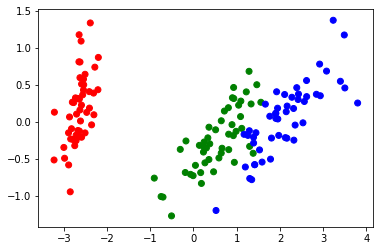

In [94]:
cmap = {0:'r',1:'g',2:'b'}
c = map(lambda x: cmap[x],iris_class)
color = list(c)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=color) 
plt.show()

# Linear Discriminant Analysis (LDA)

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [102]:
lda = LDA(n_components=2)

In [105]:
reduced_data1 = lda.fit_transform(iris_data,iris_class)

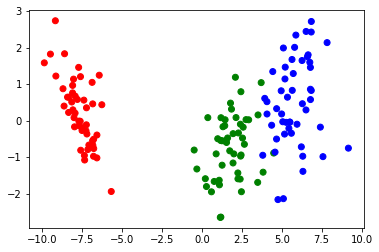

In [108]:
plt.scatter(reduced_data1[:,0],reduced_data1[:,1],c = color)
plt.show()